In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm

# 設定中文字體
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

In [32]:
URL = 'Iris.csv'
df = pd.read_csv(URL)
df = df.iloc[:,1:] #去掉id的資料
df_ = df.drop(columns=['Species']).copy() #去掉Species的資料
print(df_)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


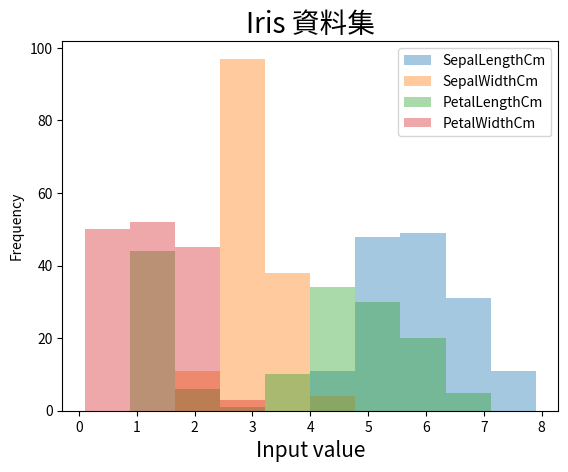

In [36]:
# 繪製 Histogram
df_.plot.hist(alpha = 0.4)
plt.legend()
plt.title('Iris 資料集', fontsize = 20)
plt.xlabel('Input value', fontsize = 15)
plt.show()

In [37]:
def Gaus_neuron(df, n, step, s): # (Data, 神經元數量, 步長, 高斯分佈的標準差)

    neurons_list = list()
    x_axis_list = list()
    t = 0

    for col in df.columns:

        vol = df[col].values
        min_ = np.min(vol)
        max_ = np.max(vol)
        x_axis = np.arange(min_, max_, step)#根據最小值、最大值和步長生成x軸
        x_axis[0] = min_
        x_axis[-1] = max_
        x_axis_list.append(np.round(x_axis, 10)) #四捨五入到小數點後10位
        neurons = np.zeros((n, len(x_axis))) #用來存儲 n 個神經元在 x_axis 上的響應

        for i in range(n): #計算每個神經元的響應
            loc = (max_ - min_) * (i /(n-1)) + min_
            neurons[i] = norm.pdf(x_axis, loc, s[t])
            neurons[i] = neurons[i] / np.max(neurons[i])

        neurons_list.append(neurons) # 存儲結果並更新索引
        t += 1

    return neurons_list, x_axis_list

In [41]:
sigm = [0.1, 0.1, 0.2, 0.1] #高斯分佈的參數
d = Gaus_neuron(df_, 10, 0.001, sigm) #產生高斯分佈
